#Rede neural para detecção de emoção: feliz ou triste

In [1]:
import cv2
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
import numpy as np
from google.colab.patches import cv2_imshow
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Conv2D, Dense, Dropout, Flatten, MaxPooling2D

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
caminho = '/content/drive/MyDrive/estudo de visao computacional/Datasets/fer2013_2_classes.zip'
zipado = zipfile.ZipFile(caminho, mode='r')
zipado.extractall('./')
zipado.close()

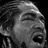

In [47]:
tf.keras.preprocessing.image.load_img('/content/fer2013_2_classes/train/Angry/101.jpg')

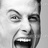

In [48]:
tf.keras.preprocessing.image.load_img('/content/fer2013_2_classes/train/Happy/1011.jpg')

In [49]:
gerador_treino = ImageDataGenerator(rescale = 1./255,
                                    rotation_range=7,
                                    horizontal_flip=True,
                                    zoom_range=0.2)
base_treino= gerador_treino.flow_from_directory('/content/fer2013_2_classes/train',
                                                target_size=(48,48),
                                                class_mode='categorical',
                                                batch_size = 50,
                                                shuffle = True)

Found 11210 images belonging to 2 classes.


In [50]:
gerador_teste = ImageDataGenerator(rescale=1./255)
base_teste = gerador_teste.flow_from_directory('/content/fer2013_2_classes/validation',
                                                target_size=(48,48),
                                                class_mode='categorical',
                                                batch_size = 1,
                                                shuffle = False)

Found 1370 images belonging to 2 classes.


<Axes: ylabel='count'>

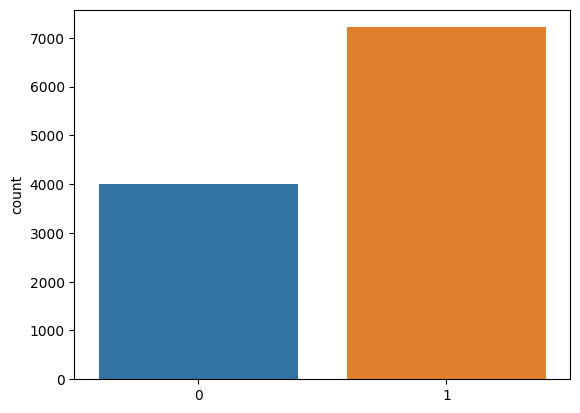

In [51]:
sns.countplot(x=base_treino.classes)

In [52]:
base_treino.class_indices

{'Angry': 0, 'Happy': 1}

In [53]:
# Based on: https://github.com/rajeevratan84/DeepLearningCV/blob/master/18.2%20Building%20an%20Emotion%20Detector%20with%20LittleVGG.ipynb
#padding: o tipo 'VALID' ignora os pixeis das bordas na hora da aplicação de kernel, já o 'SAME', mantem todos os pixeis, mantendo o tamanho da imagem
numero_detectores = 32
#numero de filtros da rede neural
numero_classes = 2
largura, altura = 48, 48
epocas = 150

rede = Sequential()
rede.add(Conv2D(filters = numero_detectores, kernel_size=(3,3), activation='relu', padding='same', input_shape=(largura,altura,3)))
rede.add(BatchNormalization())
rede.add(Conv2D(filters = numero_detectores, kernel_size=(3,3), activation='relu', padding='same'))
rede.add(BatchNormalization())
rede.add(MaxPooling2D(pool_size=(2,2)))
rede.add(Dropout(0.2))

rede.add(Conv2D(filters = 2*numero_detectores, kernel_size=(3,3), activation='relu', padding='same'))
rede.add(BatchNormalization())
rede.add(Conv2D(filters = 2*numero_detectores, kernel_size=(3,3), activation='relu', padding='same'))
rede.add(BatchNormalization())
rede.add(MaxPooling2D(pool_size=(2,2)))
rede.add(Dropout(0.2))

rede.add(Conv2D(filters = 4*numero_detectores, kernel_size=(3,3), activation='relu', padding='same'))
rede.add(BatchNormalization())
rede.add(Conv2D(filters = 4*numero_detectores, kernel_size=(3,3), activation='relu', padding='same'))
rede.add(BatchNormalization())
rede.add(MaxPooling2D(pool_size=(2,2)))
rede.add(Dropout(0.2))

rede.add(Conv2D(filters = 8*numero_detectores, kernel_size=(3,3), activation='relu', padding='same'))
rede.add(BatchNormalization())
rede.add(Conv2D(filters = 8*numero_detectores, kernel_size=(3,3), activation='relu', padding='same'))
rede.add(BatchNormalization())
rede.add(MaxPooling2D(pool_size=(2,2)))
rede.add(Dropout(0.2))

rede.add(Flatten())

rede.add(Dense(units= 2*numero_detectores, activation='relu'))
rede.add(BatchNormalization())
rede.add(Dropout(0.2))

rede.add(Dense(units= 2*numero_detectores, activation='relu'))
rede.add(BatchNormalization())
rede.add(Dropout(0.2))

rede.add(Dense(units=2, activation='softmax'))

In [54]:
rede.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 48, 48, 32)        896       
                                                                 
 batch_normalization_40 (Bat  (None, 48, 48, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_33 (Conv2D)          (None, 48, 48, 32)        9248      
                                                                 
 batch_normalization_41 (Bat  (None, 48, 48, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 24, 24, 32)       0         
 g2D)                                                            
                                                      

In [55]:
rede.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [56]:
historico = rede.fit(base_treino, epochs = epocas)

Epoch 1/150
225/225 [==============================] - 37s 75ms/step - loss: 0.7720 - accuracy: 0.5954
Epoch 2/150
225/225 [==============================] - 16s 73ms/step - loss: 0.6025 - accuracy: 0.6881
Epoch 3/150
225/225 [==============================] - 17s 73ms/step - loss: 0.4615 - accuracy: 0.7868
Epoch 4/150
225/225 [==============================] - 17s 74ms/step - loss: 0.3808 - accuracy: 0.8289
Epoch 5/150
225/225 [==============================] - 17s 74ms/step - loss: 0.3407 - accuracy: 0.8500
Epoch 6/150
225/225 [==============================] - 17s 73ms/step - loss: 0.3230 - accuracy: 0.8630
Epoch 7/150
225/225 [==============================] - 17s 75ms/step - loss: 0.3018 - accuracy: 0.8700
Epoch 8/150
225/225 [==============================] - 18s 79ms/step - loss: 0.2924 - accuracy: 0.8776
Epoch 9/150
225/225 [==============================] - 17s 73ms/step - loss: 0.2747 - accuracy: 0.8839
Epoch 10/150
225/225 [==============================] - 17s 77ms/step - l

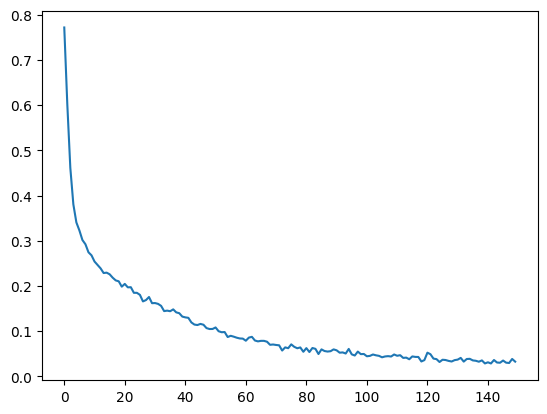

In [57]:
plt.plot(historico.history['loss'])

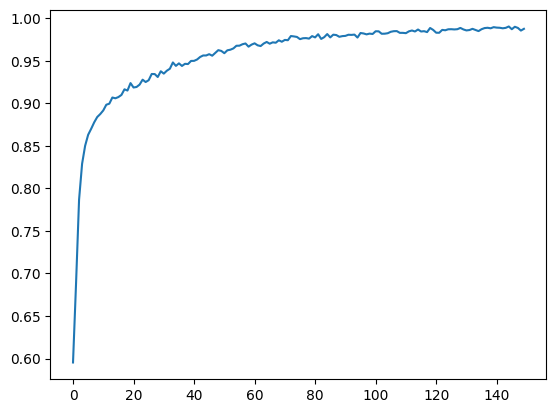

In [58]:
plt.plot(historico.history['accuracy'])

In [59]:
arquitetura = rede.to_json()
with open('/content/drive/MyDrive/redes neurais/arquitetura_F_T.json', 'w') as arquivo:
  arquivo.write(arquitetura)

In [60]:
from keras.models import save_model
rede_salve = save_model(rede,'/content/drive/MyDrive/redes neurais/pesos_F_T.hdf5')

In [ ]:
with open('/content/drive/MyDrive/redes neurais/arquitetura_F_T.json', 'r') as arquivo:
  arquitetura = arquivo.read()

In [ ]:
rede = tf.keras.models.model_from_json(arquitetura)
rede.load_weights('/content/drive/MyDrive/redes neurais/pesos_F_T.hdf5')
rede.compile(optimizer='Adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [61]:
rede.evaluate(base_teste)

1370/1370 [==============================] - 7s 5ms/step - loss: 0.2323 - accuracy: 0.9372


[0.23226231336593628, 0.9372262954711914]

In [62]:
previsoes = rede.predict(base_teste)
previsoes = np.argmax(previsoes, axis = 1)
previsoes

1370/1370 [==============================] - 5s 3ms/step


array([0, 0, 0, ..., 1, 1, 1])

In [63]:
from sklearn.metrics import accuracy_score
accuracy_score(base_teste.classes, previsoes)

0.9372262773722628

<Axes: >

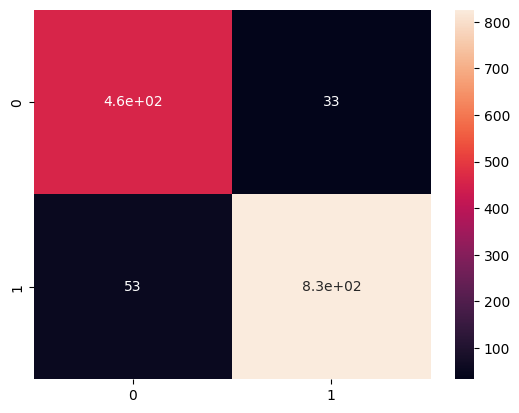

In [64]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(base_teste.classes, previsoes)
sns.heatmap(cm , annot=True)